# Vehicle Car Dekho Price Prediction - Regression Model

### Data Set Description:

The Vehicle Car Dheko project aims to develop an intelligent predictive analysis and recommendation system using machine learning techniques. The project focuses on leveraging a comprehensive dataset containing various attributes of vehicles, such as make, model, year, price, mileage, and features. By applying advanced machine learning algorithms, the system will provide valuable insights and personalized recommendations to potential buyers, enabling them to make informed decisions when purchasing a car.

### Data Fields:

| **Variable Name** | **Description** |
|--|--|
|name|name of the car|
|year|year in which car was bought|
|selling_price|selling price of the car|
|km_driven|number of kilometers the car is driven|
|fuel|fuel type of the car|
|seller_type|tells if car is sold by individual or dealer|
|transmission|Gear transmission of the car (Automatic/Manual)|
|owner|number of previous owners|
|mileage|mileage of the car|
|engine|engine capacity of the car|
|max_power|max power of engine|
|torque|torque of the car|
|seats|number of seats in the car|


### Goal:

Predicting the Price of Used Cars

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io 
%cd "D:\IMR\CapStone Project\Vehicle"

[WinError 3] The system cannot find the path specified: 'D:\\IMR\\CapStone Project\\Vehicle'
C:\Users\srava\github projects\Machine Learning Regression\project on cardheko price prediction


In [3]:
vehicle = pd.read_csv("Car details v3.csv")

In [4]:
# Checking columns and it's datatype
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
 11  torque         7641 non-null   object
dtypes: int64(3), object(9)
memory usage: 762.1+ KB


In [5]:
vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,NaN
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"4,500(kgm"


In [6]:
vehicle.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [7]:
# Cleaning the rows - "kmpl","km/kg"," "(whitespaces) in mileage 
vehicle.mileage = vehicle.mileage.str.replace("kmpl","")

In [8]:
vehicle.mileage = vehicle.mileage.str.replace("km/kg","")

In [9]:
vehicle.mileage = vehicle.mileage.str.replace(" ","")

In [10]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,1500-2500rpm


In [11]:
# Cleaning the rows - "CC" in engine

In [12]:
vehicle.engine = vehicle.engine.str.replace("CC","")

In [13]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,1500-2500rpm


In [14]:
# Cleaning the rows - "bhp" , " "(whitespaces) in max_power
vehicle.max_power = vehicle.max_power.str.replace("bhp","")

In [15]:
vehicle.max_power = vehicle.max_power.str.replace(" ","")

In [16]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,1500-2500rpm


In [17]:
vehicle.torque.unique()

array([' 2000rpm', ' 1500-2500rpm', ' 2,700(kgm', nan, ' 4,500(kgm',
       ' 4000rpm', ' 2500rpm', ' 1800-2400rpm', ' 2250rpm', ' 4500rpm',
       ' 3500rpm', ' 3500-3600rpm', ' 1750rpm', ' 3000rpm',
       ' 1500-2750rpm', ' 4850rpm', ' 1700-2700rpm', ' 1750-2500rpm',
       ' 4600rpm', ' 4800rpm', ' 1400-3400rpm', ' 1250-4000rpm',
       ' 2000-2500rpm', ' 4400rpm', ' 1200-3400rpm', ' 1200-3600rpm',
       ' 1750-3000rpm', ' 1400-2800rpm', ' 1500-3000rpm', ' 1750-3250rpm',
       ' 1350-4600rpm', ' 3750rpm', ' 3800rpm', ' 4200rpm',
       ' 1800-2800rpm', ' 4250rpm', ' 1500~4500rpm', ' 1750-2800rpm',
       ' 1900-2750rpm', ' 1900rpm', ' 3600-5200rpm', ' 4300rpm',
       ' 1750-2250rpm', ' 1600-2400rpm', ' 1250-5000rpm', ' 1600-1800rpm',
       ' 1600-3600rpm', ' 1750-2750rpm', ' 1600rpm', ' 4700rpm',
       ' 1750-4000rpm', ' 1200-4000rpm', ' 1200-1400rpm', ' 1740rpm',
       ' 3000-4300rpm', ' 3200rpm', ' 4386rpm', ' 1500-4000rpm',
       ' 1800-3250rpm', ' 1600-2800rpm', ' 3,500(

In [18]:
# Cleaning the rows - "rpm" , "(kgm" , "(NM" , "+/" , " "(whitespaces), "," , "~" ,  in max_power
vehicle.torque = vehicle.torque.str.replace("rpm","")

In [19]:
vehicle.torque = vehicle.torque.str.replace("(kgm","")

In [20]:
vehicle.torque = vehicle.torque.str.replace("(NM","")

In [21]:
vehicle.torque = vehicle.torque.str.replace("+/","")

In [22]:
vehicle.torque = vehicle.torque.str.replace(" ","")

In [23]:
vehicle.torque = vehicle.torque.str.replace(",","")

In [24]:
vehicle.torque = vehicle.torque.str.replace("~","")

In [25]:
# Calculating mean of the hyphen seperated numbers
vehicle.torque = vehicle.torque.str.split('-', expand=True).astype(float).mean(axis=1)

In [26]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,2000.0


In [27]:
# checking for missing values
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           487
dtype: int64

In [28]:
# filling null values in Mileage , Engine, Max_power , torque

In [29]:
# Mileage -
vehicle.mileage = vehicle.mileage.astype(float)

In [30]:
vehicle.mileage.describe()

count    7907.000000
mean       19.418783
std         4.037145
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [31]:
vehicle.mileage = vehicle.mileage.fillna(vehicle.mileage.mean())

In [32]:
vehicle.mileage.isnull().sum()

0

In [33]:
# Engine - 
vehicle.engine = vehicle.engine.astype(float)

In [34]:
vehicle.engine.describe()

count    7907.000000
mean     1458.625016
std       503.916303
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [35]:
# as mean and meadian are not so close 
# there is a mean distrotion that means we have so many outliers 
# so we choose median over mean
vehicle.engine = vehicle.engine.fillna(vehicle.engine.median())

In [36]:
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power        215
torque           487
dtype: int64

In [37]:
# max_power 
vehicle.max_power = pd.to_numeric(vehicle.max_power, errors='coerce', downcast='float')

In [38]:
vehicle.max_power.describe()

count    7912.000000
mean       91.517914
std        35.822365
min         0.000000
25%        68.050003
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

In [39]:
vehicle.max_power = vehicle.max_power.fillna(vehicle.max_power.median())

In [40]:
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           487
dtype: int64

In [41]:
# torque 
vehicle.torque.describe()

count    7.641000e+03
mean     6.824147e+03
std      2.426905e+05
min      1.300000e+03
25%      2.000000e+03
50%      2.400000e+03
75%      4.000000e+03
max      1.500450e+07
Name: torque, dtype: float64

In [42]:
vehicle.torque = vehicle.torque.fillna(vehicle.torque.median())

In [43]:
vehicle.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
dtype: int64

In [44]:
# All missing values are imputed

## Data Visualization

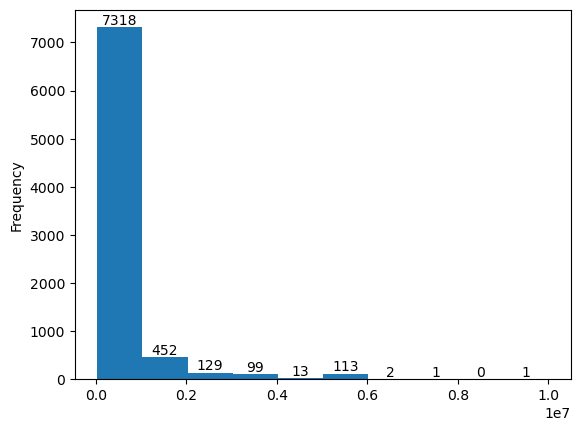

In [45]:
ax=vehicle.selling_price.plot(kind="hist")
for i in ax.containers:
    ax.bar_label(i,label_type="edge")

<Axes: >

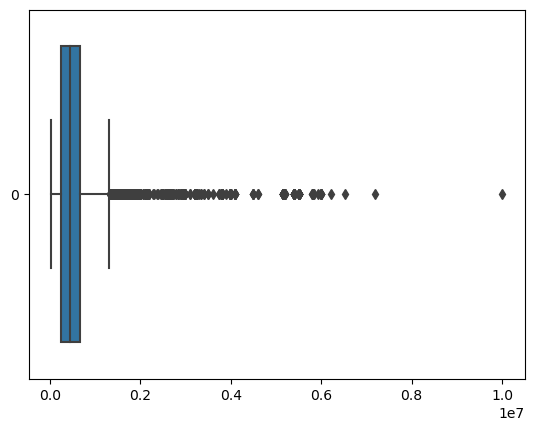

In [46]:
sns.boxplot(vehicle.selling_price,orient="h")

<Axes: xlabel='selling_price', ylabel='Density'>

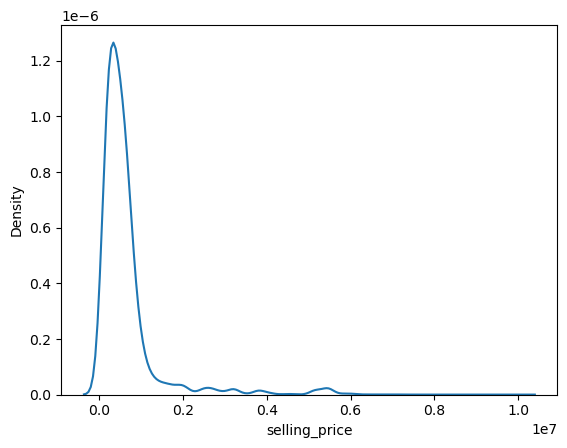

In [47]:
sns.kdeplot(vehicle.selling_price)

<Figure size 3000x1500 with 0 Axes>

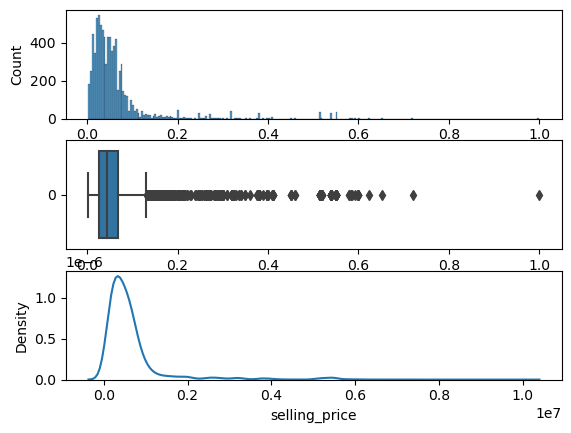

In [48]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(vehicle.selling_price,ax=ax[0])
sns.boxplot(vehicle.selling_price,orient="h",ax=ax[1])
sns.kdeplot(vehicle.selling_price,ax=ax[2])
plt.show()

#### Dependent Varibale (selling_price) is positively skewed, <br> in order to bring it to normally distributed we use logarithmic transformation<br>

<Figure size 3000x1500 with 0 Axes>

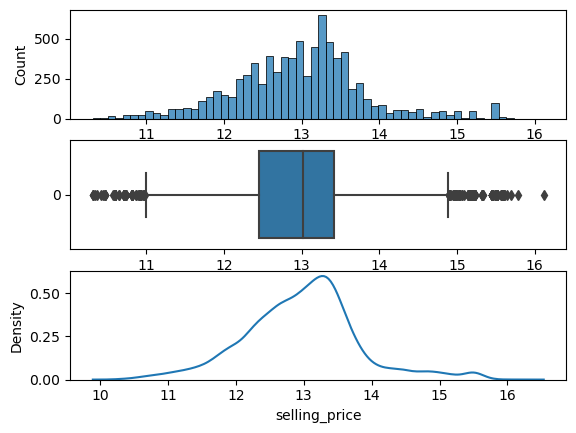

In [49]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(np.log(vehicle.selling_price),ax=ax[0])
sns.boxplot(np.log(vehicle.selling_price),orient="h",ax=ax[1])
sns.kdeplot(np.log(vehicle.selling_price),ax=ax[2])
plt.show()

In [50]:
vehicle.selling_price.max()

10000000

In [51]:
# Frequency Distribution Table
pd.cut(vehicle.selling_price,bins=[500000,1000000,1500000,2000000,2500000,3000000,10000000]).value_counts().sort_index()

selling_price
(500000, 1000000]      2668
(1000000, 1500000]      292
(1500000, 2000000]      171
(2000000, 2500000]       59
(2500000, 3000000]       70
(3000000, 10000000]     229
Name: count, dtype: int64

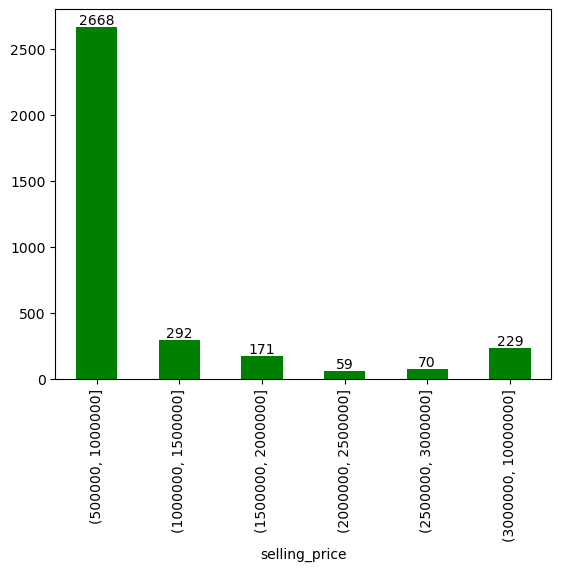

In [52]:
# Bar Plot for Frequency Distribution Table
ax=pd.cut(vehicle.selling_price,bins=[500000,1000000,1500000,2000000,2500000,3000000,10000000]
         ).value_counts().sort_index().plot(kind="bar",color="green")

for i in ax.containers :
    ax.bar_label(i)
plt.show()

<Axes: >

<Figure size 2000x2000 with 0 Axes>

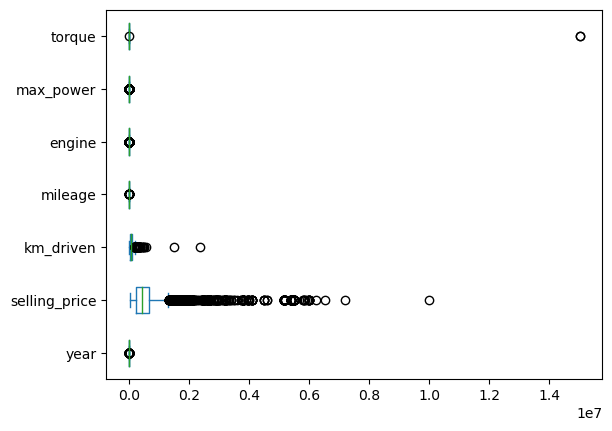

In [53]:
plt.figure(figsize=(20,20))
vehicle.plot(kind="box",vert=False)

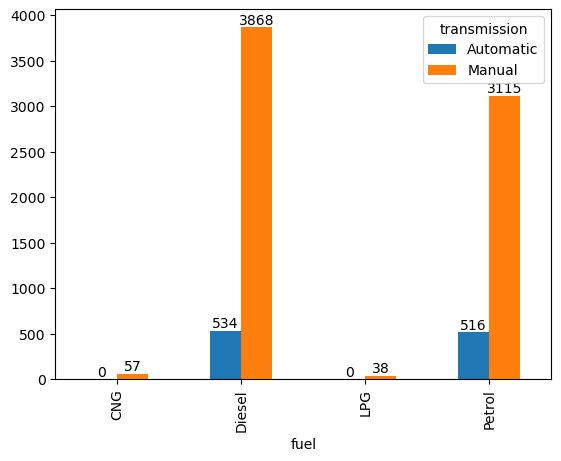

In [54]:
ax = pd.crosstab(vehicle.fuel,vehicle.transmission).plot(kind="bar")

for i in ax.containers :
    ax.bar_label(i)

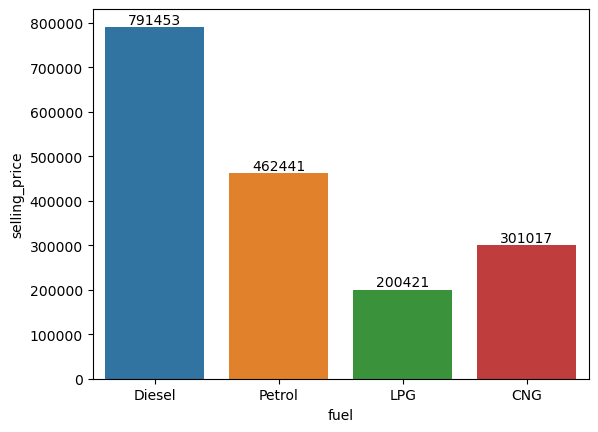

In [55]:
ax = sns.barplot(vehicle,x="fuel",y="selling_price",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='count'>

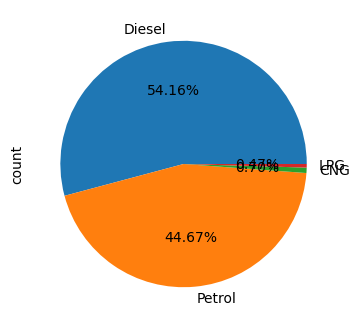

In [56]:
vehicle.fuel.value_counts().plot(kind="pie",autopct="%.2f%%",figsize=(4,4))

## Data Aggregation

In [57]:
vehicle.selling_price.groupby(vehicle.fuel).mean()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [58]:
vehicle.selling_price.groupby(vehicle.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [59]:
vehicle.mileage.groupby(vehicle.fuel).mean()

fuel
CNG       23.832546
Diesel    19.637386
LPG       18.643588
Petrol    19.092587
Name: mileage, dtype: float64

In [60]:
pd.crosstab(vehicle.fuel,vehicle.transmission)

transmission,Automatic,Manual
fuel,,
CNG,0,57
Diesel,534,3868
LPG,0,38
Petrol,516,3115


In [61]:
pd.crosstab(vehicle.fuel,vehicle.owner)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,34,2,18,0,3
Diesel,2804,88,1223,1,286
LPG,17,2,14,0,5
Petrol,2434,82,850,4,261


In [62]:
vehicle.torque.groupby(vehicle.fuel).mean()

fuel
CNG        3223.684211
Diesel     2136.379487
LPG        3581.578947
Petrol    12004.381988
Name: torque, dtype: float64

## Hypothesis Testing :

In [63]:
#Test Null Average Selling_price of diff fuel cars
vehicle.selling_price.groupby(vehicle.fuel).mean()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [64]:
# As we have more than 2 levels we use Anova test (f_oneway)

In [65]:
cng = vehicle[vehicle.fuel == "CNG"]
diesel = vehicle[vehicle.fuel == "Diesel"]
lpg = vehicle[vehicle.fuel == "LPG"]
petrol = vehicle[vehicle.fuel == "Petrol"]

In [66]:
from scipy.stats import f_oneway

In [67]:
f_oneway(cng.selling_price,diesel.selling_price,lpg.selling_price,petrol.selling_price)
# Since pvalue = 7.768067697277526e-78 is lessthan 0.05, Reject Null Hypothesis

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

Null:There is no significante difference Average Selling_price of cng,diesel,lpg,petrol.<br>
Alternate:There is a significante difference between Average Selling_price of cng,diesel,lpg,petrol .<br>

In [68]:
#Test Null Average Selling_price of diff Transmission
vehicle.selling_price.groupby(vehicle.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [69]:
vehicle.selling_price.groupby(vehicle.transmission).var()

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [70]:
automatic = vehicle[vehicle.transmission == "Automatic"]
manual = vehicle[vehicle.transmission == "Manual"]

In [71]:
# As we have exactly 2 levels we use ttest
from scipy.stats import ttest_ind

In [72]:
ttest_ind(automatic.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, reject Null Hypothesis

TtestResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129, df=1059.2814874514092)

In [73]:
#Test Null No Association between fuel and transmission
pd.crosstab(vehicle.fuel,vehicle.transmission)

transmission,Automatic,Manual
fuel,,
CNG,0,57
Diesel,534,3868
LPG,0,38
Petrol,516,3115


In [74]:
from scipy.stats import chi2_contingency

Null - There is no Association between fuel and Transmission<br>
Alt - There is Association between fuel and Transmission<br>

In [75]:
chi2_contingency(pd.crosstab(vehicle.fuel,vehicle.transmission))
# since pvalue = 6.801498516561924e-05 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,   49.63656496],
       [ 568.66387795, 3833.33612205],
       [   4.90895669,   33.09104331],
       [ 469.06373031, 3161.93626969]]))

## Data PreProcessing :

In [76]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float32
 11  torque         8128 non-null   float64
dtypes: float32(1), float64(3), int64(3), object(5)
memory usage: 730.4+ KB


In [77]:
vehicle = vehicle.drop("year",axis=1)

In [78]:
# Splitting
numcols = vehicle.select_dtypes(include=np.number)
objcols = vehicle.select_dtypes(include=["object"])

In [79]:
numcols.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque'],
      dtype='object')

In [80]:
objcols.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [81]:
print(numcols.shape)
print(objcols.shape)

(8128, 6)
(8128, 5)


In [82]:
numcols.head(2)

,selling_price,km_driven,mileage,engine,max_power,torque
0,450000,145500,23.40,1248.0,74.000000,2000.0
1,370000,120000,21.14,1498.0,103.519997,2000.0


<Axes: >

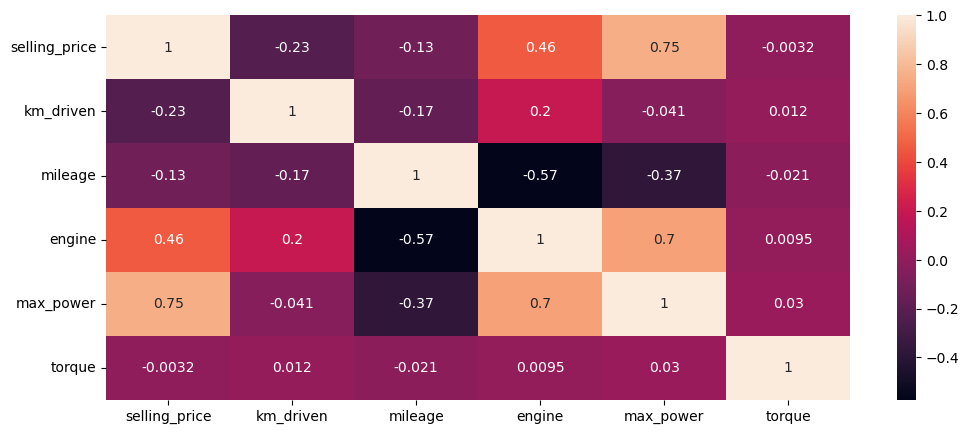

In [83]:
plt.figure(figsize=(12,5))
sns.heatmap(numcols.corr(),annot=True)

In [84]:
y = numcols.selling_price

In [85]:
numcols = numcols.drop("selling_price",axis=1)

In [86]:
numcols.describe()

,km_driven,mileage,engine,max_power,torque
count,8.128000e+03,8128.000000,8128.00000,8128.000000,8.128000e+03
mean,6.981951e+04,19.418783,1452.89813,91.264977,6.559068e+03
std,5.655055e+04,3.981875,498.19672,35.376476,2.353090e+05
min,1.000000e+00,0.000000,624.00000,0.000000,1.300000e+03
25%,3.500000e+04,16.800000,1197.00000,68.099998,2.125000e+03
50%,6.000000e+04,19.418783,1248.00000,82.000000,2.400000e+03
75%,9.800000e+04,22.277500,1582.00000,101.250000,3.800000e+03
max,2.360457e+06,42.000000,3604.00000,400.000000,1.500450e+07


In [87]:
numcols.corr()

,km_driven,mileage,engine,max_power,torque
km_driven,1.000000,-0.171426,0.198911,-0.040599,0.012107
mileage,-0.171426,1.000000,-0.574469,-0.373165,-0.020520
engine,0.198911,-0.574469,1.000000,0.703612,0.009482
max_power,-0.040599,-0.373165,0.703612,1.000000,0.029886
torque,0.012107,-0.020520,0.009482,0.029886,1.000000


<Axes: >

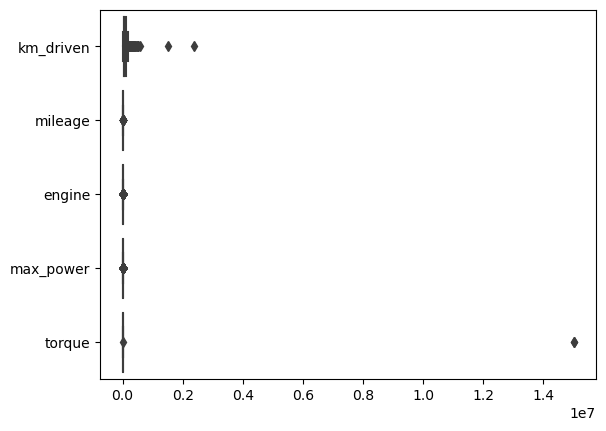

In [88]:
sns.boxplot(numcols,orient="h")

In [89]:
# We have extreame Outliers let's remove them

In [90]:
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = numcols.quantile(0.25)
Q3 = numcols.quantile(0.75)

# Calculating the IQR (Interquartile Range)
IQR = Q3 - Q1

# lower and upper bounds for extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing rows with extreme outliers
numcols = numcols[(numcols >= lower_bound) & (numcols <= upper_bound)]


<Axes: >

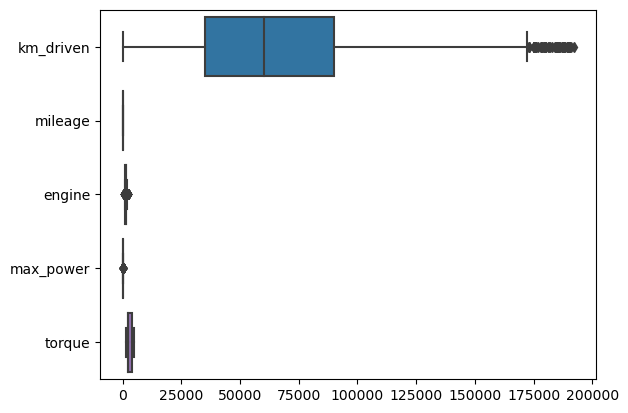

In [91]:
sns.boxplot(numcols,orient="h")

In [92]:
numcols.isnull().sum()

km_driven     170
mileage        24
engine       1183
max_power     585
torque          3
dtype: int64

In [93]:
numcols.km_driven.unique()

array([1.45500e+05, 1.20000e+05, 1.40000e+05, 1.27000e+05, 4.50000e+04,
       1.75000e+05, 5.00000e+03, 9.00000e+04, 1.69000e+05, 6.80000e+04,
       1.00000e+05, 8.00000e+04, 4.00000e+04, 7.00000e+04, 5.30000e+04,
       5.00000e+04, 7.20000e+04, 3.50000e+04, 2.80000e+04, 2.50000e+04,
       2.38800e+03, 1.62000e+04, 1.00000e+04, 1.50000e+04, 4.20000e+04,
       6.00000e+04, 7.60000e+04, 2.89000e+04, 8.63000e+04, 2.33000e+04,
       3.26000e+04, 1.03000e+04, 7.70000e+04, 9.90000e+04, 2.78000e+04,
       4.98000e+04, 1.51000e+05, 5.47000e+04, 6.40000e+04, 6.30000e+04,
       1.27700e+05, 3.39000e+04, 5.90000e+04, 1.10000e+05, 1.47000e+05,
       3.00000e+04, 1.35000e+05, 9.85000e+03, 7.80000e+04, 1.70000e+05,
       4.90000e+04, 3.20000e+04, 3.80000e+04, 4.40000e+04, 1.20000e+04,
       5.55000e+04, 6.15000e+04, 1.50000e+05, 3.78000e+04, 1.14000e+05,
       4.80000e+04, 6.90000e+04, 1.30000e+04, 7.61390e+04, 6.50000e+04,
       1.30300e+03, 3.18000e+04, 2.00000e+04, 1.70000e+04, 2.100

In [94]:
numcols.km_driven.describe()

count      7958.000000
mean      65658.445966
std       40028.522925
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      192000.000000
Name: km_driven, dtype: float64

In [95]:
numcols.km_driven = numcols.km_driven.fillna(numcols.km_driven.median())

In [96]:
numcols.mileage.unique()

array([23.4       , 21.14      , 17.7       , 23.        , 16.1       ,
       20.14      , 17.3       , 23.59      , 20.        , 19.01      ,
       19.3       , 19.41878336, 18.9       , 18.15      , 24.52      ,
       19.7       , 22.54      , 21.        , 25.5       , 26.59      ,
       21.5       , 20.3       , 21.4       , 24.7       , 18.2       ,
       16.8       , 24.3       , 14.        , 18.6       ,         nan,
       23.95      , 17.        , 20.63      , 13.93      , 16.        ,
       17.8       , 18.5       , 12.55      , 12.99      , 14.8       ,
       13.5       , 26.        , 20.65      , 27.3       , 11.36      ,
       17.68      , 14.28      , 18.53      , 14.84      , 21.12      ,
       20.36      , 21.27      , 18.16      , 22.        , 25.1       ,
       20.51      , 21.66      , 25.2       , 22.9       , 16.02      ,
       20.54      , 22.77      , 15.71      , 23.1       , 19.02      ,
       19.81      , 26.2       , 16.47      , 15.04      , 19.1 

In [97]:
numcols.mileage.describe()

count    8104.000000
mean       19.446665
std         3.861395
min         9.000000
25%        16.800000
50%        19.418783
75%        22.270000
max        30.460000
Name: mileage, dtype: float64

In [98]:
numcols.mileage = numcols.mileage.fillna(numcols.mileage.median())

In [99]:
numcols.engine.unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993., 1198., 1199.,  998., 1591.,   nan, 1368.,
       2143., 1462., 1968., 1798., 1196., 1373., 1598., 1998., 1086.,
       1194., 1172., 1405., 1582.,  999., 1999., 1995., 1451., 1969.,
       1797., 1991., 1493., 1599., 1341., 1794.,  799., 1193., 1495.,
       1186., 1047., 1120.,  624., 1496., 1984.,  814.,  793., 1799.,
        936., 1956., 1997., 1499., 1948., 1150., 1994., 1388., 1527.,
        995., 1586., 1390.,  909., 1339., 2092., 1595., 1596., 1597.,
       2148., 1299., 1590., 1795., 1896., 1796., 1422., 1489., 1781.,
       1343., 1950.])

In [100]:
numcols.engine.describe()

count    6945.000000
mean     1283.359827
std       286.595780
min       624.000000
25%      1196.000000
50%      1248.000000
75%      1461.000000
max      2148.000000
Name: engine, dtype: float64

In [101]:
numcols.engine = numcols.engine.fillna(numcols.engine.median())

In [102]:
numcols.max_power.unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  82.   ,
        67.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 ,     nan, 117.3  , 116.3  ,  83.14 ,
        67.05 , 100.   , 120.7  ,  98.63 , 103.25 , 100.6  ,  78.9  ,
        88.76 ,  86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 ,  65.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,
        98.96 ,  62.1  ,  86.7  , 148.31 , 141.   , 117.6  , 150.   ,
       147.5  , 108.5  , 103.5  ,  91.1  ,  68.   ,  75.   ,  85.8  ,
        87.2  ,  53.   , 118.   , 103.2  ,  83.   ,  84.   ,  58.16 ,
       147.94 ,  74.02 ,  53.3  ,  80.   ,  88.7  ,  97.7  , 121.36 ,
       140.   ,  94.   , 100.57 ,  82.9  ,  83.11 ,  70.   , 121.   ,
       126.3  ,  73.

In [103]:
numcols.max_power.describe()

count    7543.000000
mean       84.108864
std        23.538509
min        32.799999
25%        68.000000
50%        81.860001
75%        98.589996
max       150.000000
Name: max_power, dtype: float64

In [104]:
numcols.max_power = numcols.max_power.fillna(82)

In [105]:
numcols.torque.unique()

array([2000. , 2700. , 2400. , 4500. , 4000. , 2500. , 2100. , 2250. ,
       3500. , 3550. , 1750. , 3000. , 2125. , 4850. , 2200. , 4600. ,
       4800. , 2625. , 4400. , 2300. , 2375. , 2975. , 3750. , 3800. ,
       4200. , 4250. ,    nan, 2275. , 2325. , 1900. , 4300. , 3125. ,
       1700. , 2600. , 1600. , 4700. , 2875. , 1300. , 1740. , 3650. ,
       3200. , 4386. , 2750. , 2525. , 1800. , 3275. , 1470. , 5000. ,
       1950. , 3600. , 1820. , 4388. , 2150. , 1650. , 4100. , 4750. ,
       2950. , 3300. , 3100. , 3400. , 3775. , 1850. , 2225. , 1500. ,
       1875. , 2650. , 2800. , 3325. , 1462.5, 3175. , 2050. , 2340. ,
       3700. ])

In [106]:
numcols.torque.describe()

count    8125.000000
mean     2865.391200
std       941.266255
min      1300.000000
25%      2125.000000
50%      2400.000000
75%      3800.000000
max      5000.000000
Name: torque, dtype: float64

In [107]:
numcols.torque = numcols.torque.fillna(2400)

In [108]:
numcols.isnull().sum()

km_driven    0
mileage      0
engine       0
max_power    0
torque       0
dtype: int64

## Scaling :

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
std_scaler = StandardScaler()

In [111]:
numcols_std = std_scaler.fit_transform(numcols)

In [112]:
# changing from array to dataframe
numcols_std = pd.DataFrame(numcols_std, columns=numcols.columns)

In [113]:
numcols_std.head()

,km_driven,mileage,engine,max_power,torque
0,2.018502,1.025409,-0.113929,-0.439011,-0.919393
1,1.374782,0.439227,0.828777,0.862535,-0.919393
2,1.879660,-0.453016,0.825007,-0.262650,-0.175564
3,1.551489,0.921660,0.444153,0.266434,-0.494348
4,1.374782,-0.868013,0.074612,0.187071,1.737138


In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
minmax = MinMaxScaler()

In [116]:
numcols_minmax = minmax.fit_transform(numcols)

In [117]:
numcols_minmax = pd.DataFrame(numcols_minmax, columns= numcols.columns)

In [118]:
numcols_minmax.head()

,km_driven,mileage,engine,max_power,torque
0,0.757811,0.671016,0.409449,0.351536,0.189189
1,0.624998,0.565704,0.573491,0.603413,0.189189
2,0.729165,0.405405,0.572835,0.385666,0.378378
3,0.661457,0.652377,0.506562,0.488055,0.297297
4,0.624998,0.330848,0.442257,0.472696,0.864865


In [119]:
from sklearn.preprocessing import RobustScaler

In [120]:
robust = RobustScaler()

In [121]:
numcols_robust = robust.fit_transform(numcols)

In [122]:
numcols_robust = pd.DataFrame(numcols_robust, columns= numcols.columns)

In [123]:
numcols_robust.head()

,km_driven,mileage,engine,max_power,torque
0,1.554545,0.744153,0.000000,-0.352423,-0.238806
1,1.090909,0.321723,1.237624,0.948018,-0.238806
2,1.454545,-0.321268,1.232673,-0.176211,0.179104
3,1.218182,0.669386,0.732673,0.352423,0.000000
4,1.090909,-0.620333,0.247525,0.273128,1.253731


<Axes: >

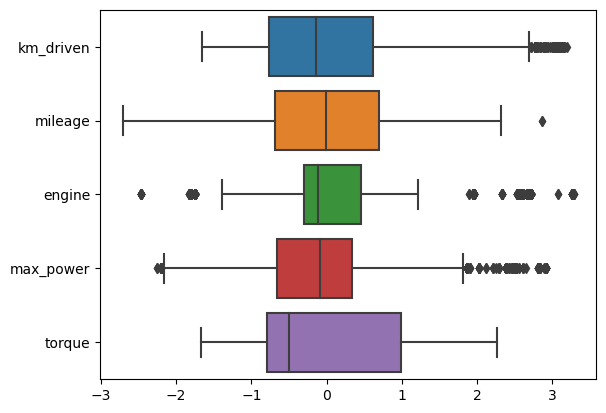

In [124]:
sns.boxplot(numcols_std, orient = "h")

In [125]:
# encoding objcols 
# as name column is creating 1000's of columns when we are dummy encoding so,we are dropping name column 
objcols = objcols.drop("name",axis=1)

In [126]:
objcols_dummy = pd.get_dummies(objcols)

In [127]:
objcols_dummy.head(2)

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,False,True,False,False,False,True,False,False,True,True,False,False,False,False
1,False,True,False,False,False,True,False,False,True,False,False,True,False,False


In [128]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [129]:
objcols_dummy.head(2)

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [130]:
combinedf = pd.concat([numcols_std,objcols_dummy], axis = 1)

In [131]:
combinedf.head(2)

,km_driven,mileage,engine,max_power,torque,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2.018502,1.025409,-0.113929,-0.439011,-0.919393,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,1.374782,0.439227,0.828777,0.862535,-0.919393,0,1,0,0,0,1,0,0,1,0,0,1,0,0


<Axes: >

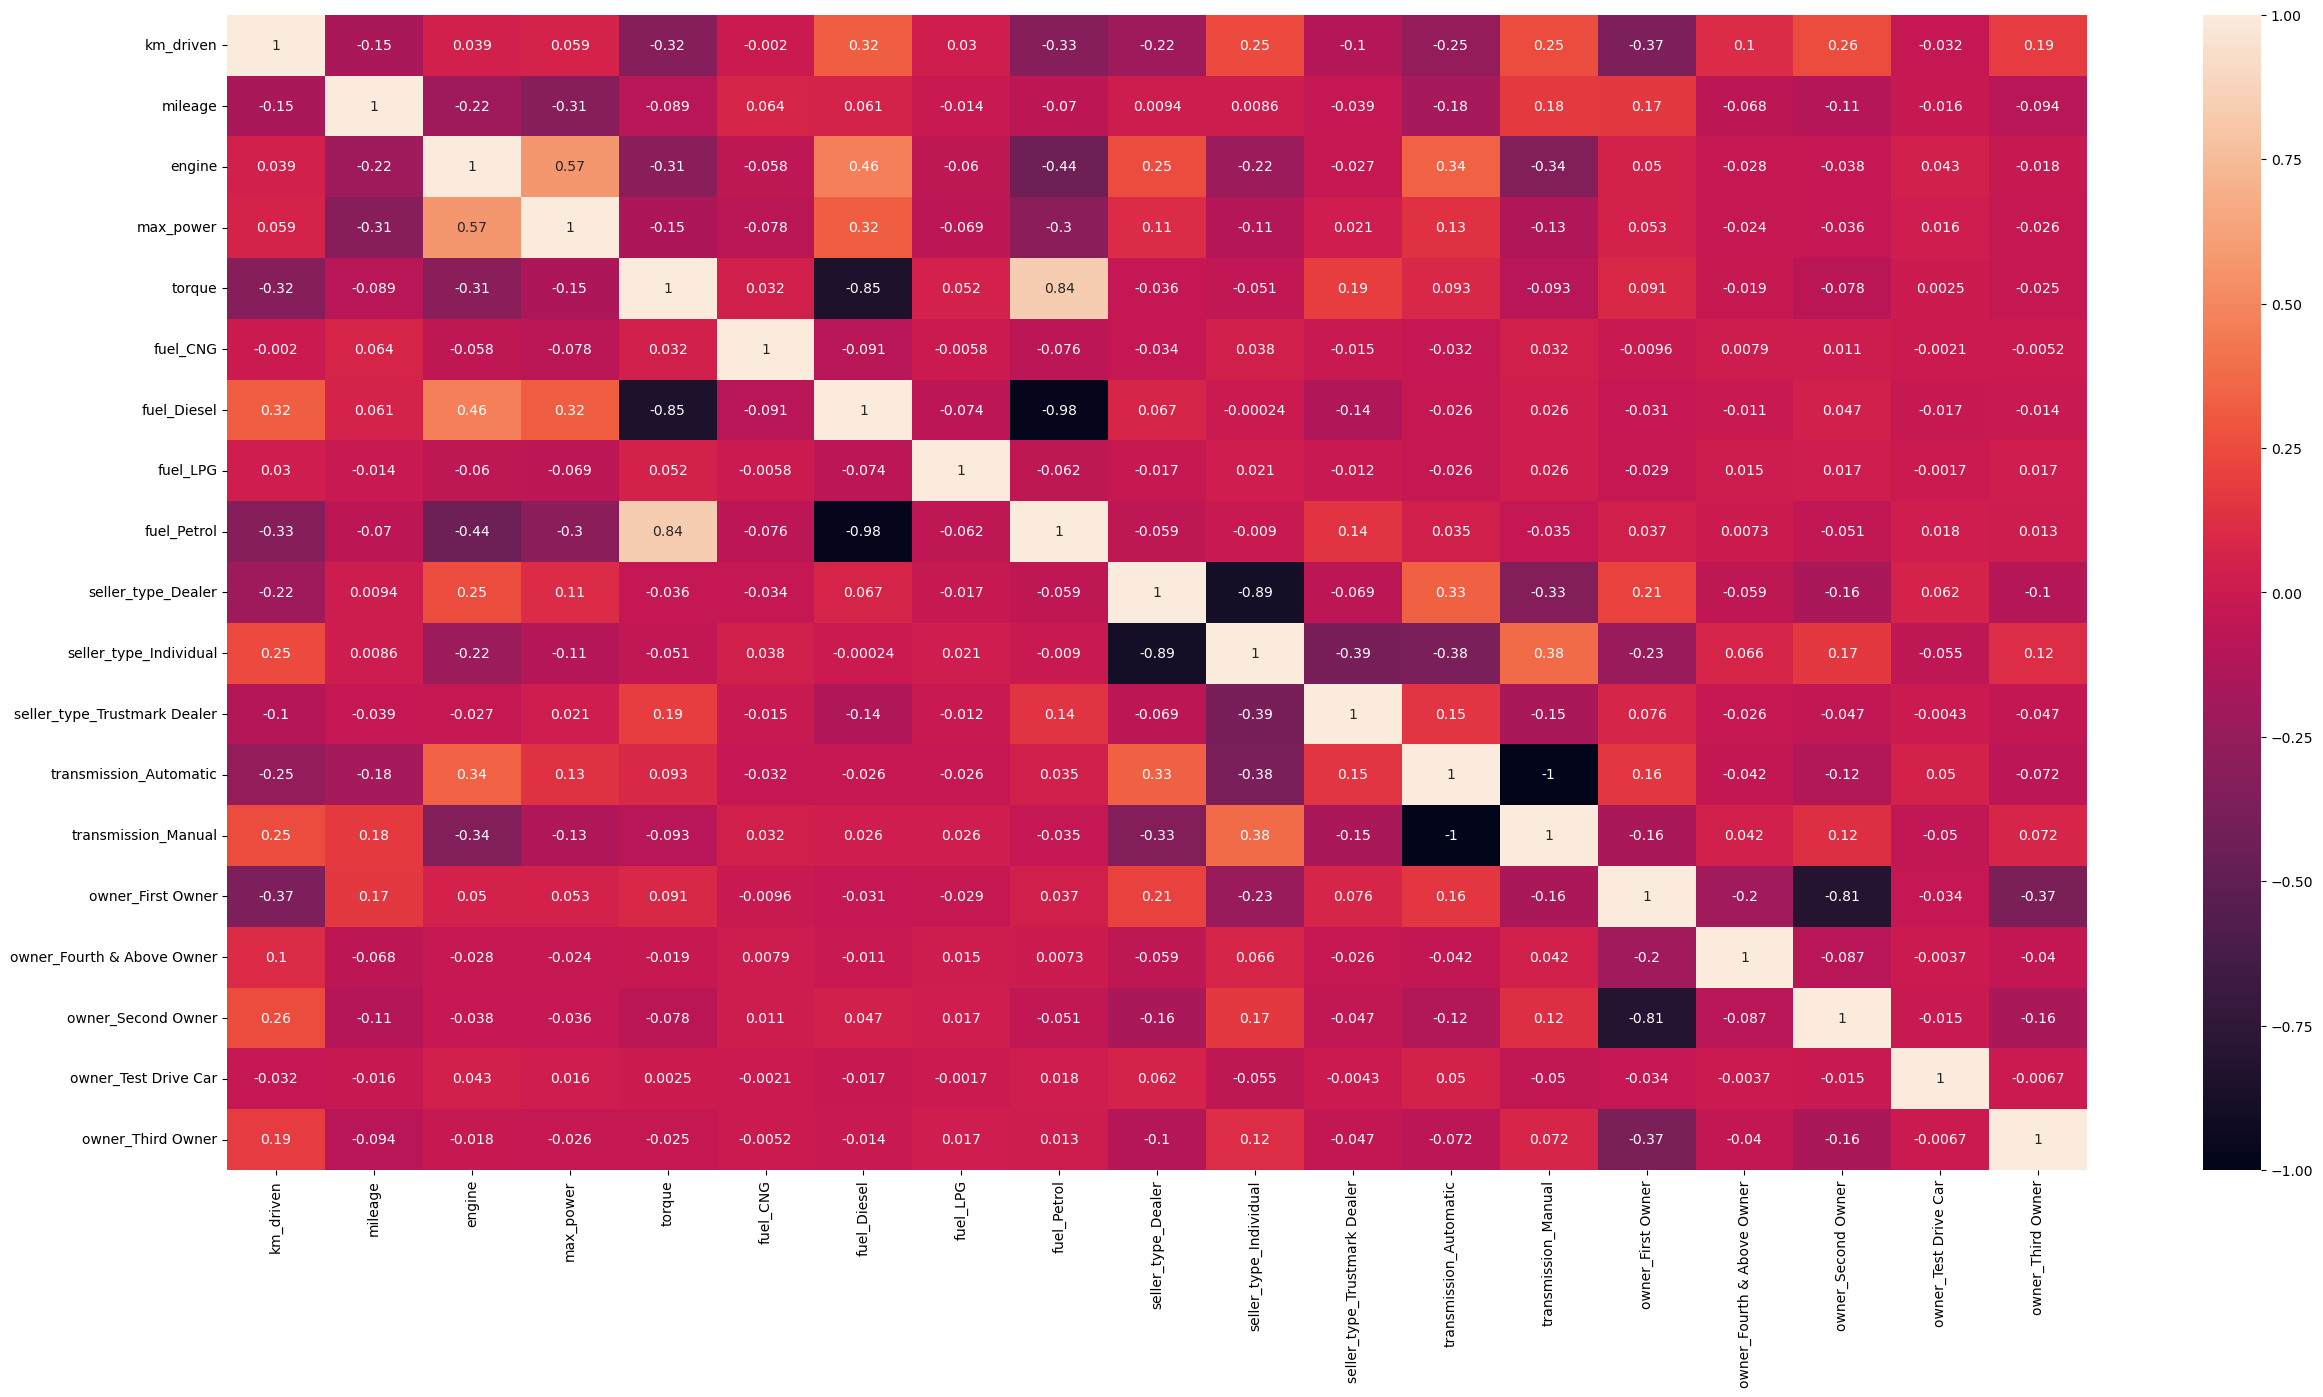

In [132]:
plt.figure(figsize=(30,15))
sns.heatmap(combinedf.corr(),annot=True)
# there is no multi collinearity

In [133]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     8128 non-null   float64
 1   mileage                       8128 non-null   float64
 2   engine                        8128 non-null   float64
 3   max_power                     8128 non-null   float64
 4   torque                        8128 non-null   float64
 5   fuel_CNG                      8128 non-null   int64  
 6   fuel_Diesel                   8128 non-null   int64  
 7   fuel_LPG                      8128 non-null   int64  
 8   fuel_Petrol                   8128 non-null   int64  
 9   seller_type_Dealer            8128 non-null   int64  
 10  seller_type_Individual        8128 non-null   int64  
 11  seller_type_Trustmark Dealer  8128 non-null   int64  
 12  transmission_Automatic        8128 non-null   int64  
 13  tra

In [134]:
# Splitting of Data into dependent and independent variables for data modeling 
X = combinedf

In [135]:
print(y.shape)
print(X.shape)

(8128,)
(8128, 19)


<Axes: xlabel='selling_price', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

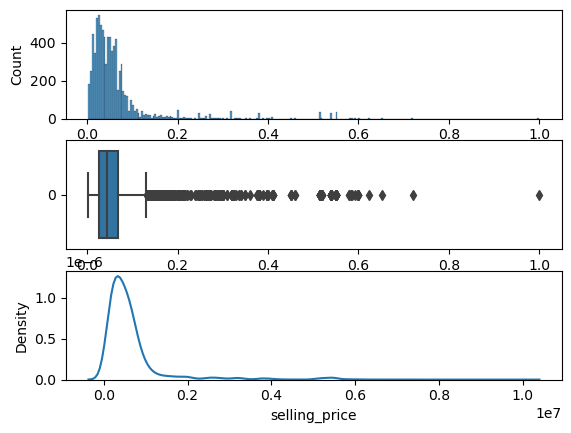

In [228]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.kdeplot(y,ax=ax[2])

## Model Building :

## Linear Regression:

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
reg = LinearRegression()

In [147]:
reg_model = reg.fit(X,np.log(y))

In [148]:
reg_model.score(X,np.log(y))

0.6254273566156876

In [226]:
cross_val_score(reg,X,np.log(y))

array([0.63582172, 0.60455993, 0.64925915, 0.60853712, 0.6076595 ])

In [227]:
np.mean([0.63582172, 0.60455993, 0.64925915, 0.60853712, 0.6076595 ])

0.621167484

In [229]:
reg_predict = reg_model.predict(X)

In [230]:
# Exponentiate the predictions to get back to the original scale
reg_predict = np.exp(reg_predict)

In [231]:
reg_residual = y - reg_predict

In [232]:
np.sqrt(np.mean(reg_residual**2)) #RMSE

581897.4722879097

## DecisionTree :

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [233]:
tree = DecisionTreeRegressor(max_depth=6)

In [234]:
treemodel = tree.fit(X,y)

In [235]:
treemodel.score(X,y)

0.8684664000388485

In [236]:
cross_val_score(tree,X,y)

array([0.84435479, 0.83459908, 0.83992134, 0.78280754, 0.80873047])

In [237]:
np.mean([0.84435479, 0.83459908, 0.83992134, 0.78280754, 0.80873047])

0.822082644

In [238]:
treepredict = treemodel.predict(X)

In [239]:
treeresidual = y - treepredict

In [240]:
np.sqrt(np.mean(treeresidual**2)) #rmse

292390.4587353817

## RandomForest :

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
ran = RandomForestRegressor(n_estimators=2000,max_depth=6)

In [242]:
ranmodel = ran.fit(X,y)

In [243]:
ranmodel.score(X,y)

0.8895627152214142

In [244]:
cross_val_score(ran,X,y)

array([0.86306417, 0.85132851, 0.89159377, 0.81993362, 0.85389309])

In [245]:
np.mean([0.86306417, 0.85132851, 0.89159377, 0.81993362, 0.85389309])

0.855962632

In [246]:
ranpredict = ranmodel.predict(X)

In [247]:
ranresid = y - ranpredict

In [248]:
np.sqrt(np.mean(ranresid**2))

267918.50035747123

## GradientBoosting :

In [171]:
from sklearn.ensemble import GradientBoostingRegressor

In [259]:
gbr = GradientBoostingRegressor(n_estimators=3000,max_depth=1)

In [260]:
gbrmodel = gbr.fit(X,y)

In [261]:
gbrmodel.score(X,y)

0.79263698473972

In [262]:
cross_val_score(gbr,X,y)

array([0.79055104, 0.77009448, 0.80914313, 0.6945704 , 0.76857732])

In [263]:
np.mean([0.79055104, 0.77009448, 0.80914313, 0.6945704 , 0.76857732])

0.766587274

In [264]:
gbrpredict  = gbrmodel.predict(X)

In [265]:
gbrresid = y - gbrpredict

In [266]:
np.sqrt(np.mean(gbrresid**2)) #RMSE

367122.0696516002

### KNN :

In [180]:
from sklearn.neighbors import KNeighborsRegressor

In [273]:
knn = KNeighborsRegressor(n_neighbors=50)

In [274]:
knnmodel=knn.fit(X,y)

In [275]:
knnmodel.score(X,y)

0.7845134105115453

In [276]:
cross_val_score(knn,X,y)

array([0.74890996, 0.74913472, 0.74798954, 0.71297351, 0.76475576])

In [277]:
np.mean([0.74890996, 0.74913472, 0.74798954, 0.71297351, 0.76475576])

0.7447526979999999

In [278]:
knnpredict = knnmodel.predict(X)

In [279]:
knnresidual = y - knnpredict

In [280]:
np.sqrt(np.mean(knnresidual**2))

374244.10415350023

## Support Vector Machine :

In [189]:
from sklearn.svm import LinearSVR

In [190]:
svr = LinearSVR(C=1000)

In [191]:
svrmodel = svr.fit(X,y)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [192]:
svrmodel.score(X,y)

0.26407892937643807

In [193]:
cross_val_score(svr,X,y)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\svm\_clas

array([0.2268845 , 0.27524271, 0.23558106, 0.26996756, 0.2680815 ])

In [194]:
np.mean([0.35745886, 0.4117798 , 0.38422253, 0.40310427, 0.40447088])

0.39220726800000005

In [195]:
svr_predict = svrmodel.predict(X)

In [196]:
svr_residual = y - svr_predict

In [197]:
np.sqrt(np.mean(svr_residual**2))

691608.7229725156

# Summary

After building and evaluating various machine learning models for the Used Cars Prices dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

| Model Name | R_square| RMSE |
|--|--|--|
| Linear Regression | 0.6254273566156876 |581897.4722879097 | 
| Decision Tree | 0.8684664000388485  |292390.4587353817  |
| **Random Forest** | **0.8895627152214142** | **267918.50035747123** |
| Gradient Boosting Machine | 0.79263698473972  |367122.0696516002  |
| k-nearest neighbors | 0.7845134105115453  | 374244.10415350023 |
| Support Vector Machine | 0.26407892937643807 | 691608.7229725156 |

The "Random Forest" model stands out with a significantly lower RMSE score compared to its counterparts, indicating its superior predictive performance for this dataset. The lower RMSE value suggests that the Random Forest model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Random Forest model as a more reliable option for regression analysis on used cars Prices dataset, prioritizing RMSE as the key performance indicator scores.